# Problem Set 1: GWAS

The goal of this problem set is to familiarize you with running a basic genome-wide association study (GWAS) on a sample dataset, and analyzing the results. You have been provided with a genotyped dataset from a previously published GWAS on Parkinson’s Disease.

For this assignment, you will need to write code in Python to answer the questions that follow. Please fill out this Jupyter Notebook with appropriate code or written answers. In case you are unfamiliar, notebooks allow for reproducible research, increased readability of code, and a "sandbox" to run basic analysis. You can make "cells" of text ("markdown cells" or just text for markdown files) interspersed with your code ("code cells") in order to explain what is happening in your code. More information on the scientific use of Jupyter Notebooks can be found in [this publication](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007).

<ins>Brief Jupyter Intro</ins>: In order to edit any cell, double click on it within the Jupyter environment. Press (Shift + Enter) to "run" the cell, or compile it such that it turns back into text, or runs the code in the cell, depending on what type of cell you are in. Most notebooks automatically move to the next cell after running the previous one. Results should pop up right below the code. A simple tutorial can be found [here](https://www.codecademy.com/articles/how-to-use-jupyter-notebooks), and more advanced questions can be answered by the Jupyter [documentation](https://jupyter.readthedocs.io/en/latest/projects/content-projects.html). 

<ins>Submission</ins>: Please submit your completed Jupyter notebook, with code and written answers, to Canvas, with the filename `pset1_SUNET` (replacing `SUNET` with your SUNET ID). You may submit the notebook as `.ipynb`, or for brownie points with the TAs, you may also compile it into web (`.html`) or document (`.pdf`) formats, making sure your lines of code/ouput don't get truncated (especially in the PDF!). 

<ins>Deadline</ins>: Monday, January 25, 2021, at 11:59pm.

## Part 1: The Study

First, read the publication by [Hon-Chung Fung, et al](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.626.7591&rep=rep1&type=pdf), "Genome-wide Genotyping in Parkinson’s Disease and Neurologically Normal Controls: First Stage Analysis and Public Release of Data" (Lancet 2006).

This is genome-wide association study on Parkinson's Disease. More than 408,000 single nucleotide polymorphisms (SNPs) were measured (genotyped) among patients with Parkinson’s Disease and control individuals without Parkinson's. Each SNP is a nucleotide which can differ across individuals. Recall that there are on the order of [10 million common SNPs in the human genome](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4750478/), meaning this dataset does not include all of them.

### 1.1

How many cases and controls were included in the study? Does this seem like enough samples to identify rare variants? Explain why or why not.


267 cases and 270 controls. It does not seem like enough to identify the low-frequency or rare MAFs. Other GWAS studies have been performed for T2D and Crohn disease, each with several hundred thousand participants and only modest heritability patterns were identified.

### 1.2

What genotyping chip was used? Exactly how many variants are measured on the chip?


Illumina Infinium 1 chip: 109,365 gene-centric SNPs
Infinium HumanHap300 chip: 317,511 haplotype tagging SNPs

### 1.3

How many samples were not included in the study due to quality control filtering? Why weren’t they included?


Four samples were dropped from control cohort, 2 due to contamination and 2 because they did not meet 95% call rate.
Six samples were dropped from the case cohort, 3 were young-onset samples and 3 because they did not meet 95% call rate.

## Part 2: Running a GWAS

[PLINK](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1950838/) is a software tool for running various types of genomic analyses, and is one of the most commonly used tools for running GWAS. You have been provided with a few files: `parkinsons.map`, `parkinsons.ped`, `1kg_chr1.bed`, and `multiallelic.missnp`. These are standard file formats which are commonly used as inputs to PLINK. You have also been provided with some other files (`common_snps.txt`, `igsr_samples.tsv`) that will be useful later in this problem.
  
Note: **For this analysis, please use [PLINK v1.9](https://www.cog-genomics.org/plink/)**, not v1.07 or v2. PLINK 2 has recently been made available, but is not yet as well documented as PLINK 1. PLINK 2 has additional features for advanced analyses and runs much faster than PLINK 1 on large datasets, but is not necessary for this problem.

### Getting started with PLINK

Install the stable build of [PLINK 1.9](https://www.cog-genomics.org/plink/) on your computer (Anaconda users: try [this command](https://anaconda.org/bioconda/plink)) and execute the below cell to run GWAS on the `parkinsons` dataset. Several files will be outputted, including `parkinsons.assoc`, which will be used in the next section.

Note: make sure the files `parkinsons.map` and `parkinsons.ped` are in the same directory as this jupyter notebook (or add the path to the dataset in front of the name `parkinsons` in the command).

In [123]:
! plink --allow-no-sex --file parkinsons --no-fid --no-sex --no-parents --assoc --out test/parkinsons

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to test/parkinsons.log.
Options in effect:
  --allow-no-sex
  --assoc
  --file parkinsons
  --no-fid
  --no-parents
  --no-sex
  --out test/parkinsons

16384 MB RAM detected; reserving 8192 MB for main workspace.
.ped scan complete (for binary autoconversion).2121212131313131314141414141415151515151616161616171717171717181818181819191919191920202020202121212121212222222222232323232324242424242425252525252626262626262727272727282828282829292929292930303030303131313131313232323232333333333334343434343435353535353636363636363737373737383838383839393939393940404040404141414141414242424242434343434343444444444445454545454646464646464747474747484848484848494949494950505050505151515151515252525252535353535353545454545455555555555656565656565757575757585858585858595959595960606060606061616161616262626262636363636363646464646465656

### 2.1

For each file (`.map`, `.ped`, `.bed`, `.missnp`), find the description of the filetype on the [PLINK website](http://zzz.bwh.harvard.edu/plink/) and describe its contents.

    .ped: This is a file with basic information for each individual plus genotype calls for genetic variants.
    Original standard text format for sample pedigree information and genotype calls. Contains no header line, and one line per sample with 2V+6 fields where V is the number of variants. The first six fields are the same as those in a .fam file. The seventh and eighth fields are allele calls for the first variant in the .map file ('0' = no call); the 9th and 10th are allele calls for the second variant; and so on. The PED file is a white-space (space or tab) delimited file, the first six columns are mandatory:
     Family ID
     Individual ID
     Paternal ID
     Maternal ID
     Sex (1=male; 2=female; other=unknown)
     Phenotype: each SNP represented by 2 positions, which give the biallelic markers.
     
     
     .map: each line of the MAP file describes a single marker and must contain exactly 4 columns:
     chromosome (1-22, X, Y or 0 if unplaced)
     rs# or snp identifier
     Genetic distance (morgans)
     Base-pair position (bp units)
     
     
     .bed: a binary .ped file to save space. Stores the pedigree/phenotype information in separate file (*.fam) and creates an extended MAP file (*.bim) (which contains information about the allele names, which would otherwise be lost in the BED file).
     
     
     .missnp: If binary merging fails because at least one variant would have more than two alleles, a list of offending variant(s) will be written to this file.

### 2.2

These files were prepared as input for PLINK. The file containing genotype data is `parkinsons.ped`. Compare and contrast ped format to [variant call format](https://samtools.github.io/hts-specs/VCFv4.2.pdf) (VCF), which is another commonly used format for storing these data.

VCF has 8 fixed feilds, vs .ped's 6. Those feilds are:

Chromosome #

Position on that chromosome

ID identifier

Reference base. Gives greater info as to the nature of the SNP observed

Alternate base: list of alternate non-reference alleles.

Quality score for the ALT info ^

Filter status, PASS if all filters are passed

INFO: additional info, includes many things such as allele freq for each ALT allele, ancestral allele, dbSNP membership, etc.

Then the VCF reveals the genotype data, which includes a reference back to the alternate list for variations, unlike the .ped file. Then goes on to include lots of other possible info such as read depth, genotype likelihoods, haplotype quality, etc. This is much more information than we would get from .ped file, which just gives the base variant.

### 2.3

Above, we used the default association test provided by PLINK. What statistical test is run by default, and why is this an appropriate option for the data we have?

The basic association test is for a disease trait and is based on comparing allele frequencies between cases and controls using a chi-square, then comparing to asymptomatic and empirical p-values. Since we are testing the relationship between categorical variables, chi-square is appropriate.

### 2.4

What are some other options for running association tests using PLINK? Name at least two.

Fischer's Exact test

Cochran-Armitage trend test

### 2.5

One commonly used statistical technique for binary trait GWAS is logistic regression. What advantages does logistic regression have over the default option you named in (2.3)?

A Chi-square test is really a descriptive test, akin to a correlation. It’s not a modeling technique, so there is no dependent variable. If you want to describe the strength of a relationship, Chi-square. If you want to model the determinants of and predict the likelihood of an outcome, logistic regression.

## Part 3: Population stratification

Population stratification occurs when genetic population structure is correlated with the outcome of interest in a genetic study. It is a problem routinely encountered in GWAS (especially of large cohorts), and can cause false positive associations. A silly example: let's say that our GWAS phenotype is eating Swiss cheese. A whole bunch of SNPs that are associated with being a Swiss person, then, would show up as hits in our "Swiss cheese GWAS". We want to avoid this kind of spurious correlation in our studies.

Let's investigate population structure in our dataset. It has been shown that principal component analysis (PCA) of genetic data can [identify ancestry groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735096/) and [correct for population stratification in GWAS](https://www.nature.com/articles/ng1847). The goal of PCA is to represent the complete data matrix (samples by SNPs) in a low-rank setting. More specifically, PCA reduces the dimensionality of the input by capturing its major axes of variation using eigenvectors (with corresponding eigenvalues) of the input's covariance matrix. The larger the eigenvalue, the more variance the eigenvector (principal component) explains in the original dataset. PCA can also be used to extract only the first $k$ eigenvalues and eigenvectors, which is more efficient than computing all components. If this material is new to you, it is highly encouraged that you read about how PCA works [here](http://www.math.union.edu/~jaureguj/PCA.pdf); it is a very useful technique for translational bioinformatics.

Luckily for us, PLINK comes with a built-in PCA option (by default, the number of components $k$ is set to 20). To investigate the ancestral composition of our `parkinsons` dataset, we will combine it with data from the [1000 Genomes Project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4750478/) and run PCA on the combined dataset. For background, the goal of the 1000 Genomes (1KG) Project was "to provide a comprehensive description of common human genetic variation by applying whole-genome sequencing to a diverse set of individuals (2504) from multiple (26) populations" (grouped into 5 superpopulations).

We will, however, need to ensure that we have enough SNPs shared by both datasets in order to run PCA — likely need at least $10^4$ SNPs, since most common variants are shared across ancestry groups. As the 1KG data are quite large (these samples were genotyped with whole-genome sequencing rather than an array, like the `parkinsons` data), we have provided you with only Chromosome 1 of the 1KG data (`1kg_chr1`). You will have to be careful when merging these two datasets, but the combined data should comprise enough SNPs for PCA, and all analyses below should run rather quickly on a laptop computer.

### 3.1

We have generated a list of SNPs common to both of the datasets that must be **extracted** (`common_snps.txt`) as well as a list of multiallelic sites that must be **excluded** (`multiallelic.missnp`). Details on how these were generated can [found here](https://docs.google.com/document/d/15wmCpKaFTlNFt4tjwGemfEhuJtAPzIKnufQS-LiScXI/edit?usp=sharing).

Write two `plink` commands to do both the extraction and the exclusion on 1) `parkinsons.ped` and 2) `1kg_chr1.bed`, and save the results to a new file. Relevant `plink` commands you might find useful: `--file`, `--bfile`, `--extract`, `--exclude`, `--make-bed`, `--out`.

<ins>Note</ins>: to run PLINK from a Jupyter notebook cell, simply preface the command with an exclamation point in the cell, like we did at the start of Part 2 to run GWAS. Here's another example, which will compute the frequency of each SNP in the `parkinsons` dataset:

```plink --allow-no-sex --file parkinsons --no-fid --no-sex --no-parents --freq --out parkinsons_af```

<ins>Note 2</ins>: You may want to look up the entries for `--allow-no-sex`, `--no-fid`, `--no-sex`, and `--no-parents` on the PLINK website, as they might be helpful when working with the `parkinsons` dataset.

In [124]:
! plink --allow-no-sex --file parkinsons --no-fid --no-sex --no-parents --freq --out snp_freq/parkinsons_af

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snp_freq/parkinsons_af.log.
Options in effect:
  --allow-no-sex
  --file parkinsons
  --freq
  --no-fid
  --no-parents
  --no-sex
  --out snp_freq/parkinsons_af

16384 MB RAM detected; reserving 8192 MB for main workspace.
.ped scan complete (for binary autoconversion).212121213131313131414141414141515151515161616161617171717171718181818181919191919192020202020212121212121222222222223232323232424242424242525252525262626262626272727272728282828282929292929293030303030313131313131323232323233333333333434343434343535353535363636363636373737373738383838383939393939394040404040414141414141424242424243434343434344444444444545454545464646464646474747474748484848484849494949495050505050515151515151525252525253535353535354545454545555555555565656565656575757575758585858585859595959596060606060606161616161626262626263636363636364

In [125]:
# YOUR PLINK COMMAND FOR 3.1 HERE (1/2)

! plink --file parkinsons --extract common_snps.txt --exclude multiallelic.missnp --no-fid --no-sex --no-parents --make-bed --out modify/parkinsons_mod

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to modify/parkinsons_mod.log.
Options in effect:
  --exclude multiallelic.missnp
  --extract common_snps.txt
  --file parkinsons
  --make-bed
  --no-fid
  --no-parents
  --no-sex
  --out modify/parkinsons_mod

16384 MB RAM detected; reserving 8192 MB for main workspace.
.ped scan complete (for binary autoconversion).212121213131313131414141414141515151515161616161617171717171718181818181919191919192020202020212121212121222222222223232323232424242424242525252525262626262626272727272728282828282929292929293030303030313131313131323232323233333333333434343434343535353535363636363636373737373738383838383939393939394040404040414141414141424242424243434343434344444444444545454545464646464646474747474748484848484849494949495050505050515151515151525252525253535353535354545454545555555555565656565656575757575758585858585859595959596

In [126]:
# YOUR PLINK COMMAND FOR 3.1 HERE (2/2)

! plink --bfile 1kg_chr1 --extract common_snps.txt --exclude multiallelic.missnp --make-bed --out modify/1kg_chr1_mod

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to modify/1kg_chr1_mod.log.
Options in effect:
  --bfile 1kg_chr1
  --exclude multiallelic.missnp
  --extract common_snps.txt
  --make-bed
  --out modify/1kg_chr1_mod

16384 MB RAM detected; reserving 8192 MB for main workspace.
Error: Failed to open 1kg_chr1.bed.


### 3.2

Next, merge the files that result from the filtration steps in (3.1). Relevant commands: `--bfile`, `--bmerge`, `--make-bed`, `--out`.

In [127]:
# YOUR PLINK COMMAND FOR 3.2 HERE

! plink --allow-no-sex --bfile modify/parkinsons_mod --bmerge modify/1kg_chr1_mod.bed modify/1kg_chr1_mod.bim modify/1kg_chr1_mod.fam --make-bed --out merge/merge

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to merge/merge.log.
Options in effect:
  --allow-no-sex
  --bfile modify/parkinsons_mod
  --bmerge modify/1kg_chr1_mod.bed modify/1kg_chr1_mod.bim modify/1kg_chr1_mod.fam
  --make-bed
  --out merge/merge

16384 MB RAM detected; reserving 8192 MB for main workspace.
541 people loaded from modify/parkinsons_mod.fam.
2504 people to be merged from modify/1kg_chr1_mod.fam.
Of these, 2504 are new, while 0 are present in the base dataset.
23288 markers loaded from modify/parkinsons_mod.bim.
23288 markers to be merged from modify/1kg_chr1_mod.bim.
Of these, 0 are new, while 23288 are present in the base dataset.
23285 more multiple-position warnings: see log file.
Performing single-pass merge (3045 people, 23288 variants).
Merged fileset written to merge/merge-merge.bed + merge/merge-merge.bim +
merge/merge-merge.fam .
23288 varia

### 3.3 

Finally, run PCA on the merged file from (3.2). You should get two files as results - `plink.eigenval` and `plink.eigenvec`.

Load `plink.eigenvec` and `plink.eigenval` into pandas and take a look. What do these files contain?

In [128]:
# YOUR PLINK COMMAND FOR 3.3 HERE
! plink --allow-no-sex --bfile merge/merge --pca --out eigen/eigen

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to eigen/eigen.log.
Options in effect:
  --allow-no-sex
  --bfile merge/merge
  --out eigen/eigen
  --pca

16384 MB RAM detected; reserving 8192 MB for main workspace.
23288 variants loaded from .bim file.
3045 people (0 males, 0 females, 3045 ambiguous) loaded from .fam.
Ambiguous sex IDs written to eigen/eigen.nosex .
541 phenotype values loaded from .fam.
Using up to 8 threads (change this with --threads).
Before main variant filters, 3045 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999342.
23288 variants and 3045 people pass filters and QC.
Among remaining phenotypes, 270 are cases an

In [129]:
# YOUR CODE FOR 3.3 HERE
import pandas as pd
vectors = pd.read_csv('eigen/eigen.eigenvec', sep=' ', header=None)
print(f"vectors:\n {vectors}")
values = pd.read_csv('eigen/eigen.eigenval', header=None)
print(f"values:\n {values}")

vectors:
            0        1         2             3         4         5         6   \
0     HG00096  HG00096 -0.010963 -1.685180e-02 -0.003983 -0.001950  0.029594   
1     HG00097  HG00097 -0.009644 -1.854270e-02 -0.004391 -0.004544  0.027951   
2     HG00099  HG00099 -0.010698 -1.811690e-02 -0.008796 -0.002710  0.028119   
3     HG00100  HG00100 -0.011708 -1.760700e-02 -0.004536  0.003537  0.023294   
4     HG00101  HG00101 -0.011003 -1.881000e-02 -0.007955  0.003605  0.029565   
5     HG00102  HG00102 -0.010730 -1.755590e-02 -0.003370 -0.003578  0.031808   
6     HG00103  HG00103 -0.011740 -1.676210e-02 -0.007480 -0.003107  0.028664   
7     HG00105  HG00105 -0.011425 -1.742850e-02 -0.004327 -0.007375  0.033623   
8     HG00106  HG00106 -0.012937 -1.422830e-02 -0.005070 -0.000800  0.024030   
9     HG00107  HG00107 -0.010218 -1.759650e-02 -0.008319 -0.003855  0.025906   
10    HG00108  HG00108 -0.010138 -1.676820e-02 -0.009711 -0.005523  0.027342   
11    HG00109  HG00109 -0.0107

YOUR WRITTEN ANSWER TO 3.3 HERE

.eigenvec contains a row for each of our subjects. Each row begins with the subject's FID and IID, then the 20 (default) principle component weights in the same order as is written in the .eigenval folder.

### 3.4

Now, let's see what we've generated. To analyze these data, do the following:

- Left-join the `plink.eigenvec` table you loaded into pandas earlier with `igsr_samples.tsv` in order to get the superpopulation code per individual.
- All of the individuals that do not have a superpopulation code in the resultant table are from the Parkinson's dataset. Label them as such by filling in the NA values in this column with the string `Parkinsons`.
- Create a scatterplot with PC1 on the x-axis and PC2 on the y-axis for all individuals, coloring the dots by superpopulation code. Visualizing these two PCs allows us to view the two largest axes of "spread" in this dataset. While `matplotlib` does not easily handle a color column, the `seaborn` module has a function `lmplot` that does. Useful parameters you might want to enable/disable in this function: `hue`, `fit_reg`.

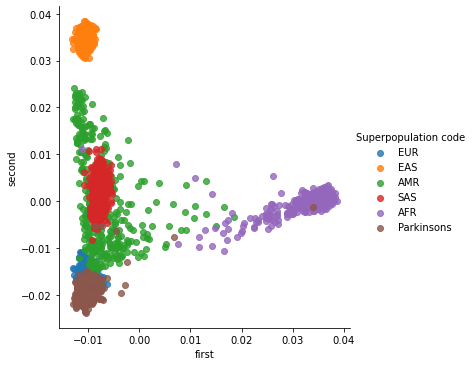

In [130]:
# YOUR CODE FOR 3.4 HERE
pd.options.display.max_rows = 4000
igsr = pd.read_csv('data/igsr_samples.tsv', sep='\t')

vectors = vectors.rename(columns={2: 'first', 3: 'second'})

merged = vectors.merge(igsr, left_on=0, right_on='Sample name',  how='left')

check = merged['Superpopulation code'].isnull().sum()

parkinson = {'Superpopulation code': "Parkinsons"}
merged = merged.fillna(value=parkinson)
# check = merged['Superpopulation code'].isnull().sum()

import seaborn as sns

graph = sns.lmplot(x='first', y='second', data=merged, hue='Superpopulation code', fit_reg = False)

### 3.5

From this plot, which population does the Parkinson's dataset seem closest to? Does this make sense given the description of study cohort?

YOUR WRITTEN ANSWER TO 3.5 HERE

The Parkinson's dataset most resembles the European cohort, which makes sense given the fact that msot of the cohort is of European ancestry.

### 3.6

There are quite a few people in the 1kG dataset that are of admixed ancestry (not purely of one superpopulation, but in the space between them). What difficulties could arise when doing studies in admixed populations?

YOUR WRITTEN ANSWER TO 3.6 HERE

Since you would want to eliminate ancestry as a confounding variable, having an admixed population would present a challenge in making sure that your control and case cohorts were of a similar background. Easier to have a group strictly from one group in particular than to have two groups who are the same amount of mixed ancestry.

## Part 4: Analysis

Refer back to `parkinsons.assoc` from Part 2. Use Python to write code to perform analysis, and answer each of the following questions.

### 4.1

List and describe each column included in the `.assoc` file.

YOUR WRITTEN ANSWER TO 4.1 HERE

CHR: Chromosome code
SNP: Variant identifier
BP:	Base-pair coordinate
A1:	Allele 1 (usually minor)
F_A: Allele 1 frequency among cases
F_U: Allele 1 frequency among controls
A2: Allele 2
CHISQ: Allelic test chi-square statistic. Not present with 'fisher'/'fisher-midp' modifier.
P: Allelic test p-value
OR: odds(allele 1 | case) / odds(allele 1 | control)

### 4.2

How many rows have NAs for the $p$-value? Why might this be?

In [131]:
# YOUR CODE FOR 4.2 HERE
assoc = pd.read_csv('test/parkinsons.assoc', delim_whitespace=True)
print(assoc)

print(assoc['P'].isnull().sum())

        CHR         SNP        BP A1       F_A      F_U A2   CHISQ        P  \
0         1   rs2977670    763754  C  0.029880  0.01245  G  3.5780  0.05856   
1         1   rs7526509   1038797  T  0.011110  0.00369  A  2.0300  0.15420   
2         1   rs3934834   1045729  T  0.133100  0.14770  C  0.4684  0.49370   
3         1   rs3766193   1057093  G  0.431500  0.42250  C  0.0890  0.76550   
4         1  rs12096277   1057521  G  0.001852  0.00369  A  0.3306  0.56530   
...     ...         ...       ... ..       ...      ... ..     ...      ...   
408796   24   rs9645172  14467757  T       NaN      NaN  C     NaN      NaN   
408797   24   rs2319537  14475472  G       NaN      NaN  A     NaN      NaN   
408798   24   rs9786000  14498916  C       NaN      NaN  T     NaN      NaN   
408799   24   rs7067278  14814626  G       NaN      NaN  A     NaN      NaN   
408800   24   rs7067474  16252218  A       NaN      NaN  C     NaN      NaN   

            OR  
0       2.4440  
1       3.0340  


YOUR WRITTEN ANSWER TO 4.2 HERE

There are 905 rows with a p-value of NAN. It appears that for many of these individuals, there are also no A1, F_A, or F_U data, so determining a p-value would be impossible.

### 4.3

Create a manhattan plot to visualize the results of the GWAS. Describe each of the axes in your own words. We recommend you use the `qqman` toolkit, which can be installed as a [python module](https://pypi.org/project/qqman/).

In [132]:
# YOUR CODE FOR 4.3 HERE
from qqman import qqman

qqman.manhattan("test/parkinsons.assoc", out="test/parkinsons_manhattan.png")

YOUR WRITTEN ANSWER TO 4.3 HERE

The x-axis represents all of the SNPs grouped by chromosome. The y-axis is a negative log of the associated p-value for each SNP and the disease.

### 4.4

For GWAS, a Bonferroni correction is typically used to account for multiple hypothesis testing. Describe the method and why this is necessary.

YOUR WRITTEN ANSWER TO 4.4 HERE

The method involves taking a p-value that we want to satsify and divide it by the number of hypotheses that we will be testing. This is necessary because, in the course of testing many hypotheses, some are bound to dip below our unadjusted p-value purely from happenstance.

### 4.5

The widely accepted Bonferroni adjusted $p$-value threshold for GWAS is of $5x10^{-8}$. Using this threshold, how many significant hits are there? For the three variants with the smallest $p$-values (regardless of significance), search the internet for functional information and list your findings (e.g. what genes they are related to, whether they are coding or non-coding, etc). If they are associated with a gene, describe the function of the gene and whether it is logical that it could be related to Parkinson’s.

In [133]:
# YOUR CODE FOR 4.5 HERE

print(f"significant hits: {assoc.loc[assoc.P < 0.00000005, 'P'].count()}")

print(f"Three smallest: {assoc.nsmallest(3, 'P')}")

significant hits: 1
Three smallest:         CHR         SNP         BP A1      F_A     F_U A2  CHISQ  \
215059    9  rs10963676   18612043  G  0.05702  0.1704  T  30.35   
395278   22   rs5766565   43943221  T  0.25560  0.4096  G  28.77   
405852   23   rs5958478  123244763  A  0.30710  0.5130  C  28.07   

                   P      OR  
215059  3.611000e-08  0.2944  
395278  8.138000e-08  0.4949  
405852  1.173000e-07  0.4208  


YOUR WRITTEN ANSWER TO 4.5 HERE

There was one significant hit.

rs10963676 is most closely associated with an intron of the ADAMTSL1 gene which is associated with various diseases like microcephaly, ocular anaomalies. Appears to be related to peptidase activity. 

rs5766565 is associated witht intron of the KIAA0930 variant. There doesn't appear to be much information on diseases associated with this gene except diffuse pulmonary fibrosis.

rs5958478 is associated with the intron variants of both TENM1 and LOC105373331. TENM1 is a transmembrane protein expressed on neurons and may function as a cellular signal transducer. Quite likely that this has significance to our target disease Parkinson's.

### 4.6
How do these results compare to the original study? Why might they be different?


Note: we expect your results to be quite different. Don’t panic!

YOUR WRITTEN ANSWER TO 4.6 HERE

The original study listed a lot more candidate SNPs which might be associated. It states that their uncorrected significance level is p=0.000001, which is not as strict as our correction.